<a href="https://colab.research.google.com/github/MohdSharik99/AirBnB-analysis/blob/main/Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

###Let's get started


Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more.

##Let's deep dive into the data and get insights 
### 1. Loading data

In [140]:
# mount the drive and read required data
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [141]:
#import necessary libreries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%magic inline


In [142]:
df = pd.read_csv('/content/drive/MyDrive/Alma better/Airbnb NYC 2019.csv')

In [143]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


### 2.Understanding and cleaning data

In [ ]:
# get the shape of our data
df.shape

(48895, 16)

In [ ]:
# exploring basic infor about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [ ]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

By exploring the shape of this data we summarise that this data contains 48895 rows and 16 columns whereas info. of this data helps us to understand that there are some missing values across certain columns and we don't need special treatment. 

let's move ahead and find out some more facts to clean the data. for better understanding we will move from left to right across the dataframe.

In [ ]:
# exploring total number of unique values in id column
df.id.nunique()

48895

In [ ]:
# exploring total number of unique values in host_id column
df.host_id.nunique()

37457

In [ ]:
# exploring total number of unique values in name column
df.name.nunique()

47905

#### Notice that we have some columns which can be irrelavent to our analysis and these are.
1. id (Since all the values in id column are unique hence this column has no use in analysis).
2. name (Since we have 47905 unique values and some missing values hence this column also has no use in analysis )
3. last_review (it's simply the date of review and since we already have num_of_reviews and reviews_per_month so we can drop this one )

we can drop these columns
 

In [ ]:
df =df.drop(['id', 'last_review','name'], axis =1)

Notice that we have 10052 missing values in reviews_per_month column. Since this column just contains the number of reviews per month we can assume that there was no review at missing places. Basis this assumption we can replace these null values with zero. 

In [ ]:
df['reviews_per_month'].fillna(0, inplace = True)

In [ ]:

df.head()

,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [ ]:
# checking null values across data
df.isnull().sum()

host_id                            0
host_name                         21
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
reviews_per_month                  0
calculated_host_listings_count     0
availability_365                   0
dtype: int64

Great ! We have cleaned our data and we are ready to analyse Airbnb data. Let's enter into the Exploratory data analysis.

## 3. EDA and Visualization

In [ ]:
# let's explore how many unique neighbourhood group we have
df.neighbourhood_group.nunique()

5

In [ ]:
# finding the number of nieghbourhoods 
df.neighbourhood.nunique()

221

In [ ]:
# exploring how many room type do we have
df.room_type.nunique()

3

Now we know that we have 5 neighbourhood groups, 221 neighbours and 3 different type of rooms.


### 3.1 learning from top 10 host id's having most number of listings.

In [ ]:
# getting top 10 host id's having most number of listings
top_host =df.host_id.value_counts().head(10)

In [ ]:
# converting it into dataframe
top_host_df = pd.DataFrame(top_host)
top_host_df.reset_index(inplace = True)
top_host_df.rename(columns= {'index': 'Host_id', 'host_id': 'listing_counts'} , inplace = True)
top_host_df



,Host_id,listing_counts
0,219517861,327
1,107434423,232
2,30283594,121
3,137358866,103
4,16098958,96
5,12243051,96
6,61391963,91
7,22541573,87
8,200380610,65
9,7503643,52


Let's plot this data using matplotlib.

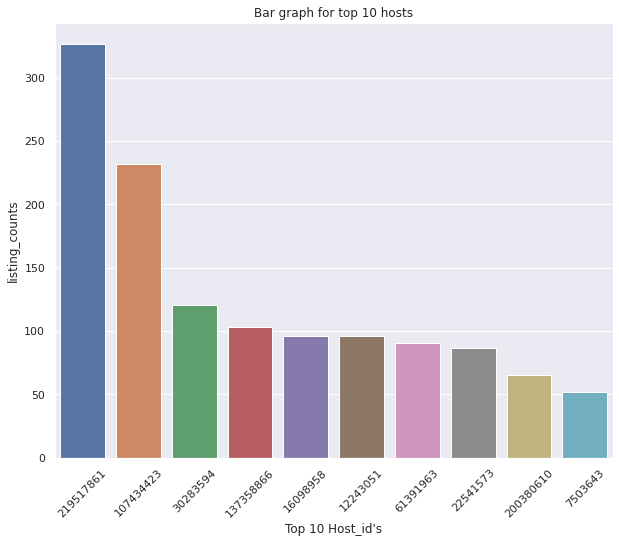

In [ ]:
plt.figure(figsize = (10,8))
sns.barplot(data= top_host_df, x='Host_id', y= 'listing_counts',order = top_host_df.sort_values('listing_counts', ascending = False).Host_id )
plt.title('Bar graph for top 10 hosts')
plt.xlabel("Top 10 Host_id's")
plt.ylabel('listing_counts')
plt.xticks(rotation = 45)
plt.show()


## Plot summary 1
With this plot and data we can see the distribution of top 10 Host id's having most number of listings. We also can summarise the most listed Host id has total 327 listing which is approx 3 times from the second highest Host id.


### 3.2 Let's explore the neighbourhood groups distribution across NYC

In [ ]:
# getting neighbourhood_group distribution and converting it into a dataframe

neig_dist = pd.DataFrame(df['neighbourhood_group'].value_counts()).reset_index()
neig_dist.rename(columns = {'index':'neighbourhood_group','neighbourhood_group': 'listing_counts' })

,neighbourhood_group,listing_counts
0,Manhattan,21661
1,Brooklyn,20104
2,Queens,5666
3,Bronx,1091
4,Staten Island,373


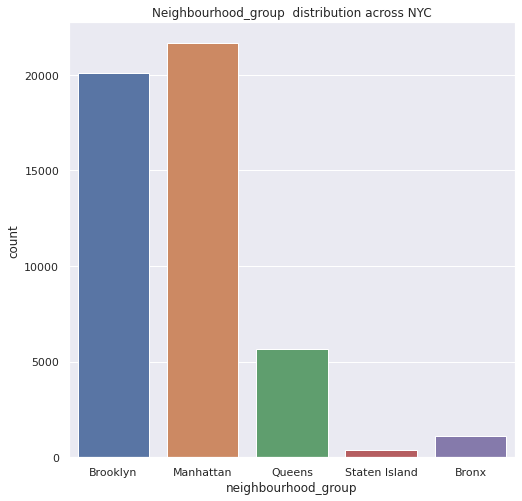

In [ ]:
# plotting this data
plt.figure(figsize = (8,8))
sns.countplot(data = df, x= 'neighbourhood_group')
plt.title('Neighbourhood_group  distribution across NYC')
plt.show()

### Plot summary 2
With this plot we have found that most listed group is Manhattan followed by Brooklyn and so on.

Let's look at this distribution of room type across various groups

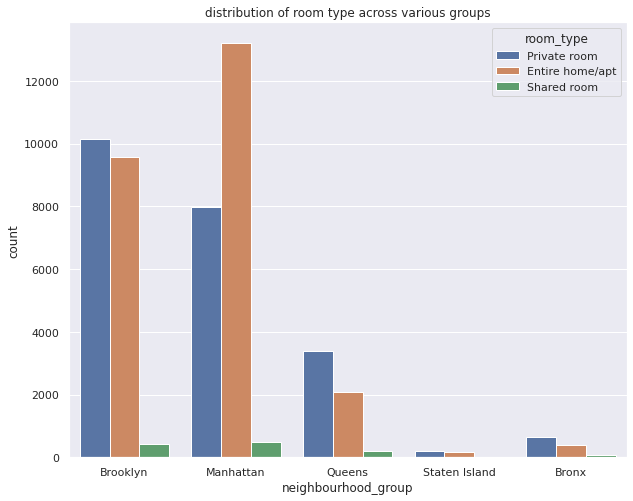

In [ ]:
# Plotting distribution of room type across various groups
plt.figure(figsize= (10,8))

sns.countplot(data = df, x= 'neighbourhood_group' , hue= 'room_type')
plt.title('distribution of room type across various groups')
plt.show()

## Plot summary 3
Looks like that although Manhattan has highest number of listings but in reference of private rooms Manhattan is followed by Brooklyn.

### Hey, did you notice that there is almost no contribution of shared rooms ? In order to understand this anamoly let's plot room type across data.

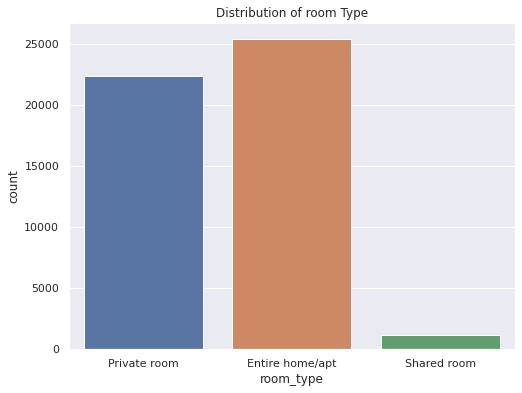

In [ ]:
# we can understand the distribution of room type across the data

plt.figure(figsize = (8,6))
sns.countplot(data = df, x= 'room_type')
plt.title('Distribution of room Type')
plt.show()

## Plot summary 4
it is quite interesting that contribution of shared rooms in listings is very small and may be neglected.

we can summarise it in a table.

In [ ]:
# creating a table of percentage of each type of room 
room_type_dist = pd.DataFrame(df.room_type.value_counts()/len(df)*100).reset_index()
room_type_dist.rename(columns = {'index': ' Room Type', 'room_type': 'Percentage_of_room_type'})

,Room Type,Percentage_of_room_type
0,Entire home/apt,51.966459
1,Private room,45.661111
2,Shared room,2.372431


From this data we can say that most of the listed room are either Private room, or Entire home and there are only 2% shared rooms.


## We can also get findings from neighbourhood columns. Let's find top 10 neighbourhoods having highest number of listings in NYC and plot them across various room types

In [ ]:
# finding the top10 neighbourhoods in terms of listing
pd.DataFrame(df.neighbourhood.value_counts().head(10))

,neighbourhood
Williamsburg,3920
Bedford-Stuyvesant,3714
Harlem,2658
Bushwick,2465
Upper West Side,1971
Hell's Kitchen,1958
East Village,1853
Upper East Side,1798
Crown Heights,1564
Midtown,1545


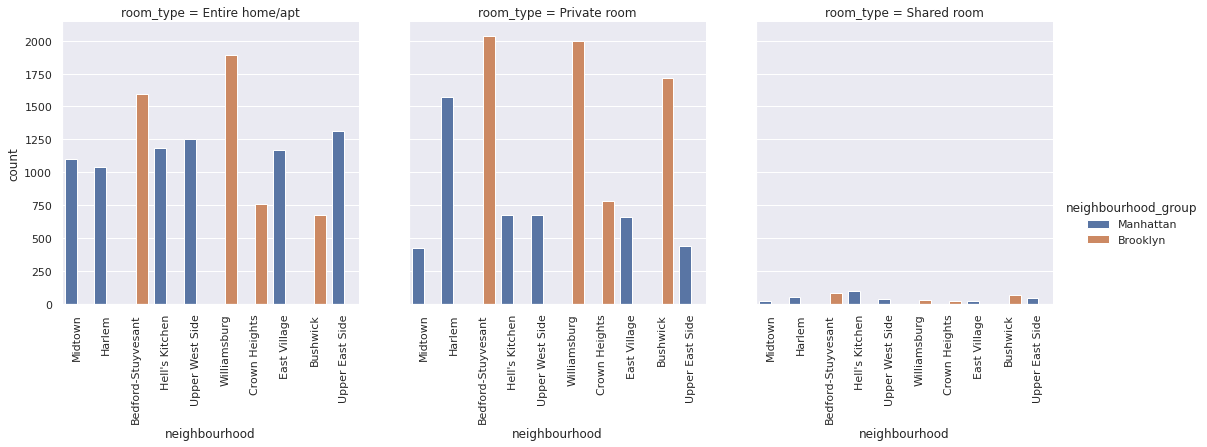

In [ ]:
#creating a data frame of above values
sub_7=df.loc[df['neighbourhood'].isin(['Williamsburg','Bedford-Stuyvesant','Harlem','Bushwick',
                 'Upper West Side','Hell\'s Kitchen','East Village','Upper East Side','Crown Heights','Midtown'])]
#using catplot to represent multiple interesting attributes together and a count
viz=sns.catplot(x='neighbourhood', hue='neighbourhood_group', col='room_type', data=sub_7, kind='count')
viz.set_xticklabels(rotation=90)
plt.show()

## Plot summary 5
we have observed that in top 10 neighbourhoods belong to Manhattan and Brooklyn.

## Now this is the time to get insights from price.

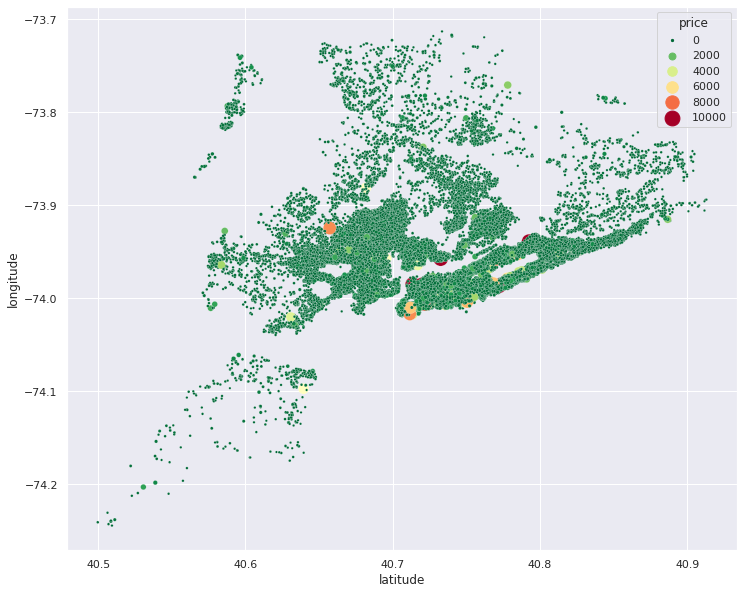

In [ ]:
plt.figure(figsize = (12,10))
sns.set(style="darkgrid")

sns.scatterplot(data= df, x = 'latitude', y= 'longitude', hue= 'price', palette ='RdYlGn_r', sizes= (5,250),size = 'price',  )
plt.show()

## Plot Summary 6

Hey ! did you know notice that there are some outliers in price. Let's look at the price(min, max, and some quantiles)

In [ ]:
# 75th Percentile
def Q75(x):
    return x.quantile(0.75)

# 90th Percentile
def Q90(x):
    return x.quantile(0.9)

# 97th Percentile
def Q97(x):
    return x.quantile(0.97)
df.groupby('neighbourhood_group').agg({'price':['median','mean','min',Q75, Q90,Q97,'max']})


price                                            
                    median        mean min    Q75    Q90    Q97    max
neighbourhood_group                                                   
Bronx                 65.0   87.496792   0   99.0  145.0  282.4   2500
Brooklyn              90.0  124.383207   0  150.0  210.0  350.0  10000
Manhattan            150.0  196.875814   0  220.0  333.0  599.0  10000
Queens                75.0   99.517649  10  110.0  175.0  275.0  10000
Staten Island         75.0  114.812332  13  110.0  184.0  299.0   5000

This table is showing us the price at levels.


## Let's now plot the mean of the price across the groups

In [ ]:
# creating a data frame of mean price with respect to neighbourhood_group
price_dist = pd.DataFrame(df.groupby('neighbourhood_group')['price'].mean())
price_dist.reset_index(inplace =True)
price_dist.rename(columns = {'price': 'mean_price'}, inplace= True)
price_dist

,neighbourhood_group,mean_price
0,Bronx,87.496792
1,Brooklyn,124.383207
2,Manhattan,196.875814
3,Queens,99.517649
4,Staten Island,114.812332


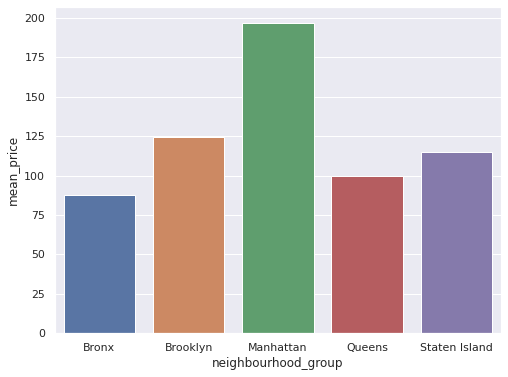

In [ ]:
# plotting the above distribution
plt.figure(figsize = (8,6))

sns.barplot(data = price_dist, x = 'neighbourhood_group', y= 'mean_price')
plt.show()

## Plot summary 7

by looking at this graph we can conclude that Manhattan has highest mean price to understand the price distribution in more depth.

### let's understand the distribution of price across neighbourhood_gorups using violin plots. for this we will limit price by 500 to not to involve outliers in our findings.

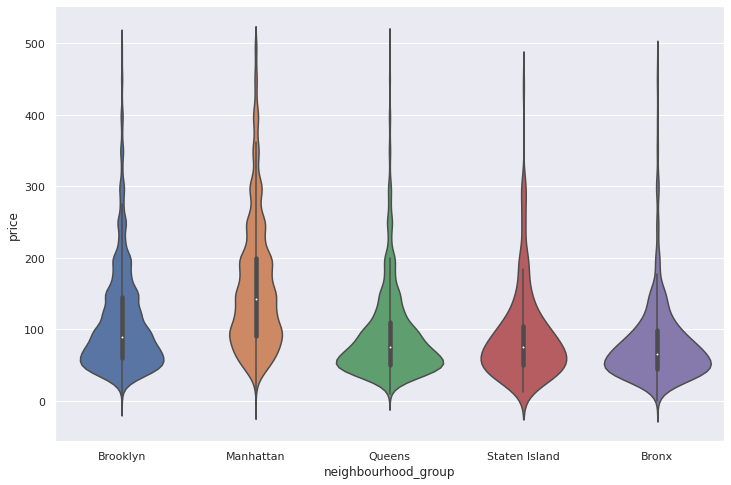

In [ ]:
plt.figure(figsize = (12,8))
sub_data=df[df.price < 500]
sns.violinplot(data= sub_data, x= 'neighbourhood_group', y = 'price')
plt.show()


## Plot summary 8

with this plot we can summarise the Manhattan has highest noise in price follwed by Brooklyn and so on.

We can also analyse the availability. for this first we will calculate the mean of availability across groups and then we will see the plot for it.

In [ ]:
# calculating the mean of availability accross various groups
df.groupby('neighbourhood_group').agg({'availability_365':['mean']})

,availability_365
,mean
neighbourhood_group,
Bronx,165.758937
Brooklyn,100.232292
Manhattan,111.979410
Queens,144.451818
Staten Island,199.678284


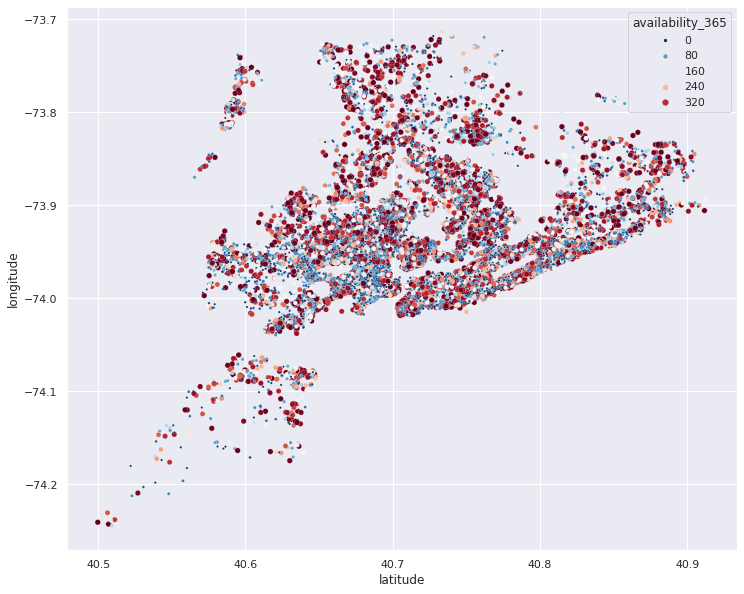

In [ ]:
# plotting the availability across various groups
plt.figure(figsize = (12,10))
sns.set(style="darkgrid")

sns.scatterplot(data= df, x = 'latitude', y= 'longitude', hue= 'availability_365', palette ='RdBu_r', size='availability_365', sizes=(5,30))
plt.show()


## Plot summary 9

With this plot we are able to summarise that availability is uniformly distributed across NYC. however, mean can help us to get the average availabilty in groups as table above is showing.

we have one more feature named number_of_reviews. let's get the sum of reviews across groups

In [ ]:
df.groupby('neighbourhood_group').agg({'number_of_reviews':['sum']})

,number_of_reviews
,sum
neighbourhood_group,
Bronx,28371
Brooklyn,486574
Manhattan,454569
Queens,156950
Staten Island,11541


This is summarised table for various groups about their sum of reviews.


## Finally we will plot corr. matrix which will help us to understand the correlation accross data features.

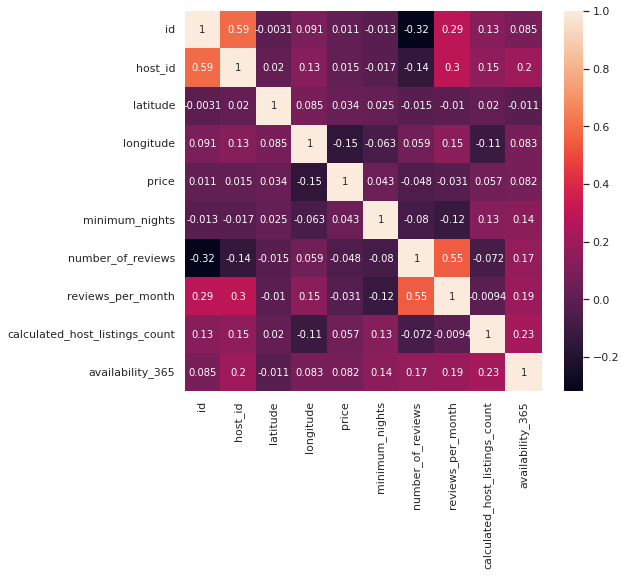

In [144]:
# Plotting the corr. matrix
plt.figure(figsize= (8,7))

sns.heatmap(df.corr(), annot = True)
plt.show()

# Summary

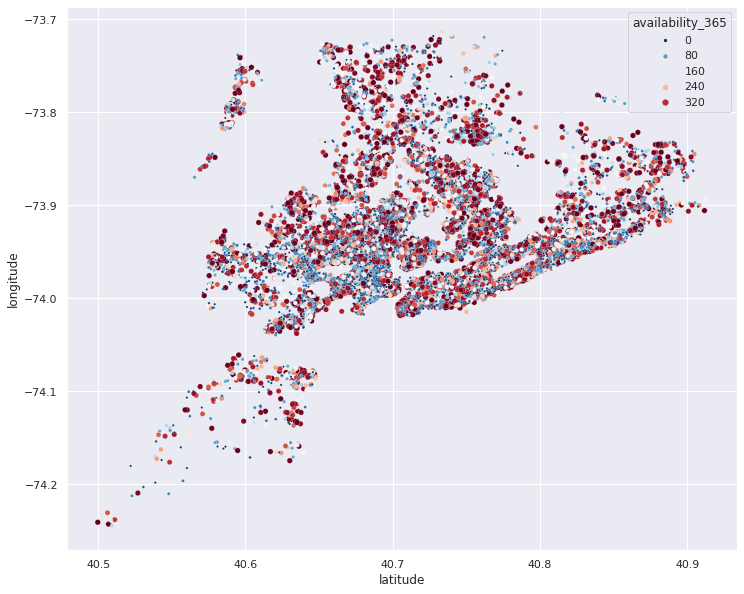

In [ ]:
plt.figure(figsize = (12,10))
sns.set(style="darkgrid")

sns.scatterplot(data= df, x = 'latitude', y= 'longitude', hue= 'availability_365', palette ='RdBu_r', size='availability_365', sizes=(5,30))
plt.show()

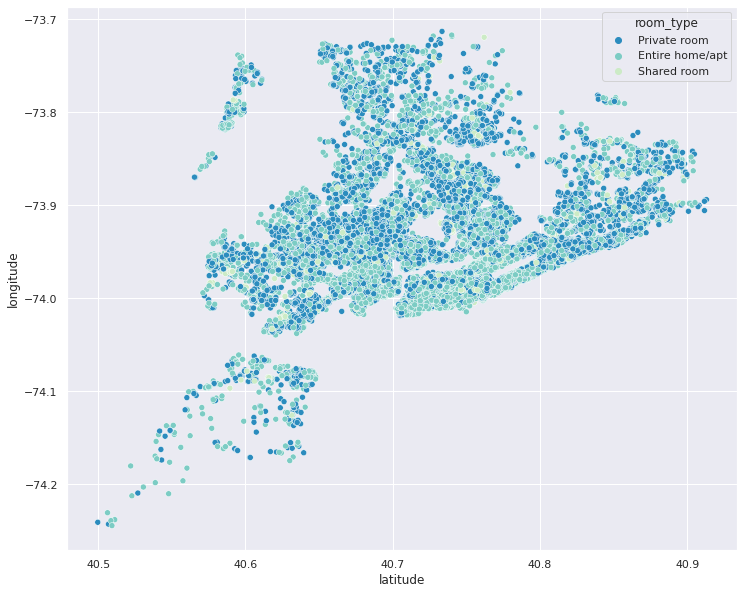

In [ ]:
plt.figure(figsize = (12,10))
sns.set(style="darkgrid")

sns.scatterplot(data= df, x = 'latitude', y= 'longitude', hue= 'neighbourhood_group', palette ='afmhot', size='availability_365', sizes=(5,20))
plt.show()


In [219]:
new=pd.DataFrame(df.groupby('host_name')['price'].sum().sort_values(ascending= False))
new.price.sum()

7464948

In [220]:
df.price.sum()

7467278

In [221]:
3008429/7467278

0.4028816122822801

In [236]:

m = []
n = ['top_10', 'top_50', ' top_100', ' top_200', ' top_500','top_1000', 'all_hosts']
for i in [10,50,100,200,500,1000,11452]:
  if i in range(10,1001):
    total_price =new.head(i).price.sum()
    m.append(total_price)
  else: 
    m.append(new.tail(11452).price.sum())
    


 

In [237]:
print(m)
np.array(m).sum()

[543081, 1511069, 2195160, 3008429, 4183807, 5068262, 7464948]


23974756

In [238]:
new_df = pd.DataFrame({'top_hosts': n, 'total_revenue':m})
new_df

,top_hosts,total_revenue
0,top_10,543081
1,top_50,1511069
2,top_100,2195160
3,top_200,3008429
4,top_500,4183807
5,top_1000,5068262
6,all_hosts,7464948


In [246]:
new_df['percentage_occupied']= (new_df['total_revenue']/df.price.sum()*100).round(2)
new_df


,top_hosts,total_revenue,percentage_occupied
0,top_10,543081,7.27
1,top_50,1511069,20.24
2,top_100,2195160,29.40
3,top_200,3008429,40.29
4,top_500,4183807,56.03
5,top_1000,5068262,67.87
6,all_hosts,7464948,99.97


(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

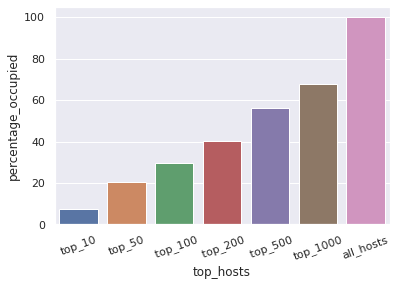

In [248]:
p =sns.barplot(data=new_df, x= 'top_hosts', y='percentage_occupied')
plt.xticks(rotation = 20)


In [179]:
new.tail().sum()

price    44067
dtype: int64

In [175]:
new.head(1000).sum()

price    5068262
dtype: int64

In [176]:
new.price.sum()

7464948

In [184]:
new.price.head(20000).sum()

7464948

In [185]:
# new=pd.DataFrame(df.groupby('host_name')['price'].sum().sort_values(ascending= True))
# new.price.sum()

7464948

In [188]:
new.price.head(20000).sum()

7464948

In [189]:
new.size

11452